In [1]:
import pandas as pd
import numpy as np

import pandas_profiling as pdp

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load data
train_df = pd.read_csv("../input/train_data.csv")
test_df = pd.read_csv("../input/test_data.csv")

In [3]:
columns = ["id", "credit", "gender", "education", "marriage", "age"]
columns += [f"payment_{i}" for i in range(9, 3, -1)]
columns += [f"claim_{i}" for i in range(9, 3, -1)]
columns += [f"advance_{i}" for i in range(9, 3, -1)]
train_df.columns = columns + ["target"]
test_df.columns = columns

# EDA

## overview

In [4]:
# まずは各列の値を確認してみましょう
train_df.head()

,id,credit,gender,education,marriage,age,payment_9,payment_8,payment_7,payment_6,...,claim_6,claim_5,claim_4,advance_9,advance_8,advance_7,advance_6,advance_5,advance_4,target
0,0,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
4,4,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [5]:
# 統計量を確認します
train_df.describe()

,id,credit,gender,education,marriage,age,payment_9,payment_8,payment_7,payment_6,...,claim_6,claim_5,claim_4,advance_9,advance_8,advance_7,advance_6,advance_5,advance_4,target
count,27000.00000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,2.700000e+04,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,13499.50000,166856.284444,1.603074,1.853741,1.551556,35.502407,-0.012519,-0.128185,-0.162370,-0.216037,...,43247.852074,40345.600926,38894.870926,5644.593222,5.934313e+03,5229.052593,4855.124630,4782.051667,5238.613148,0.222000
std,7794.37297,129363.239705,0.489269,0.789234,0.521767,9.221539,1.121953,1.196953,1.195634,1.169587,...,64150.721252,60681.919736,59547.938323,16499.811285,2.360826e+04,17745.539585,15826.973077,15154.386855,17865.467132,0.415599
min,0.00000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6749.75000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2392.750000,1798.500000,1287.000000,1000.000000,8.500000e+02,396.000000,300.000000,272.000000,140.000000,0.000000
50%,13499.50000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19114.000000,18219.500000,17179.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,20249.25000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54537.750000,50211.000000,49243.500000,5007.000000,5.000000e+03,4500.000000,4014.250000,4069.000000,4002.250000,0.000000
max,26999.00000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
# 欠損値は無いようですね
print("================================train_df null rate================================")
print(train_df.isna().mean())
print("================================test_df null rate================================")
print(train_df.isna().mean())

================================train_df null rate================================
id           0.0
credit       0.0
gender       0.0
education    0.0
marriage     0.0
age          0.0
payment_9    0.0
payment_8    0.0
payment_7    0.0
payment_6    0.0
payment_5    0.0
payment_4    0.0
claim_9      0.0
claim_8      0.0
claim_7      0.0
claim_6      0.0
claim_5      0.0
claim_4      0.0
advance_9    0.0
advance_8    0.0
advance_7    0.0
advance_6    0.0
advance_5    0.0
advance_4    0.0
target       0.0
dtype: float64
================================test_df null rate================================
id           0.0
credit       0.0
gender       0.0
education    0.0
marriage     0.0
age          0.0
payment_9    0.0
payment_8    0.0
payment_7    0.0
payment_6    0.0
payment_5    0.0
payment_4    0.0
claim_9      0.0
claim_8      0.0
claim_7      0.0
claim_6      0.0
claim_5      0.0
claim_4      0.0
advance_9    0.0
advance_8    0.0
advance_7    0.0
advance_6    0.0
advance_5    0.0
adva

In [7]:
# pandas-profilingは強力なツールです
# このOverViewを見ることで、大まかな方針を考えることができるでしょう
pdp.ProfileReport(train_df)

Number of variables,25
Number of observations,27000
Total Missing (%),0.0%
Total size in memory,5.1 MiB
Average record size in memory,200.0 B
Numeric,18
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,5


## targetで比較する

### categorical features

C:\Users\nadare\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


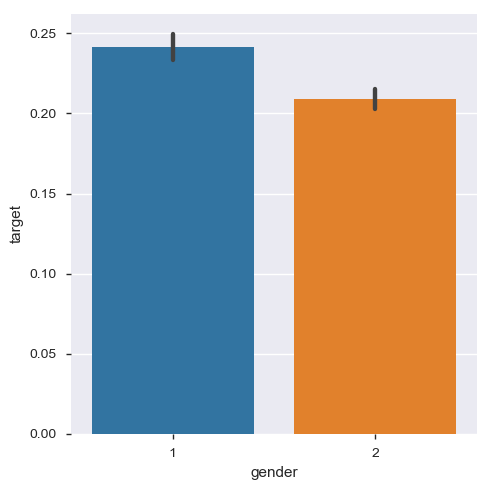

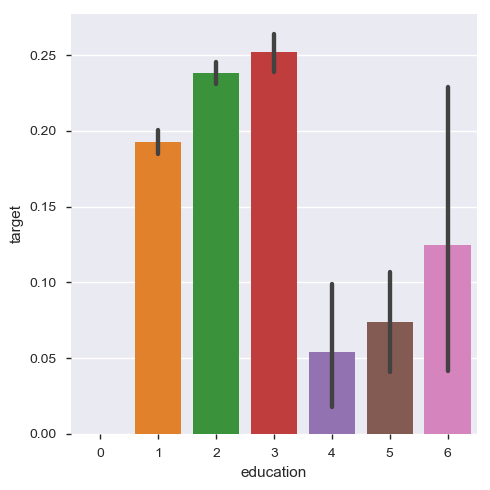

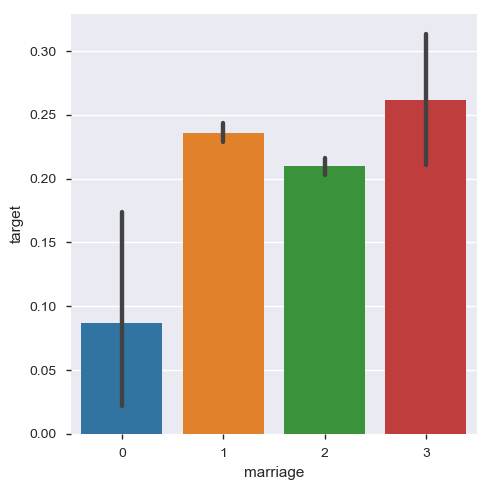

In [8]:
columns = ["gender", "education", "marriage"]

for col in columns:
    sns.catplot(x=col, y="target", data=train_df, kind="bar")

### numerical features

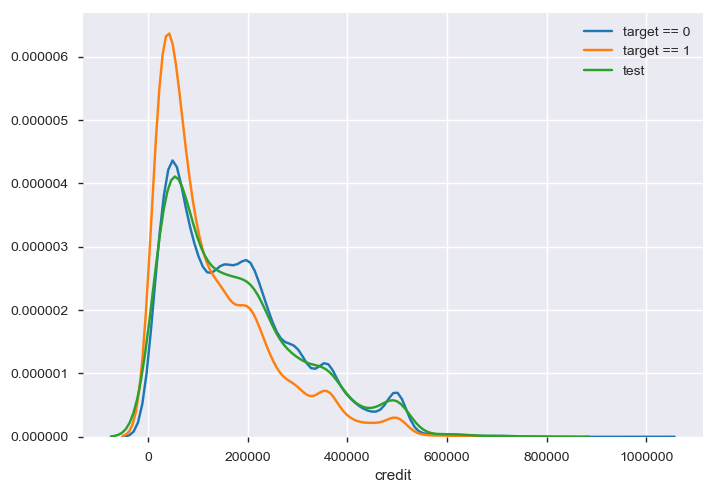

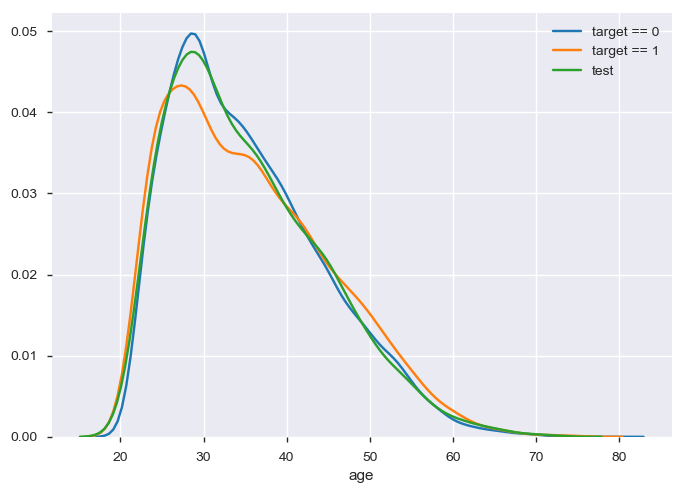

<Figure size 800x550 with 0 Axes>

In [9]:
numerical_col = ["credit", "age"]
for col in numerical_col:
    sns.kdeplot(train_df[col][train_df["target"] == 0], label="target == 0")
    sns.kdeplot(train_df[col][train_df["target"] == 1], label="target == 1")
    sns.kdeplot(test_df[col], label="test")
    plt.xlabel(col)
    plt.show()
    plt.clf()

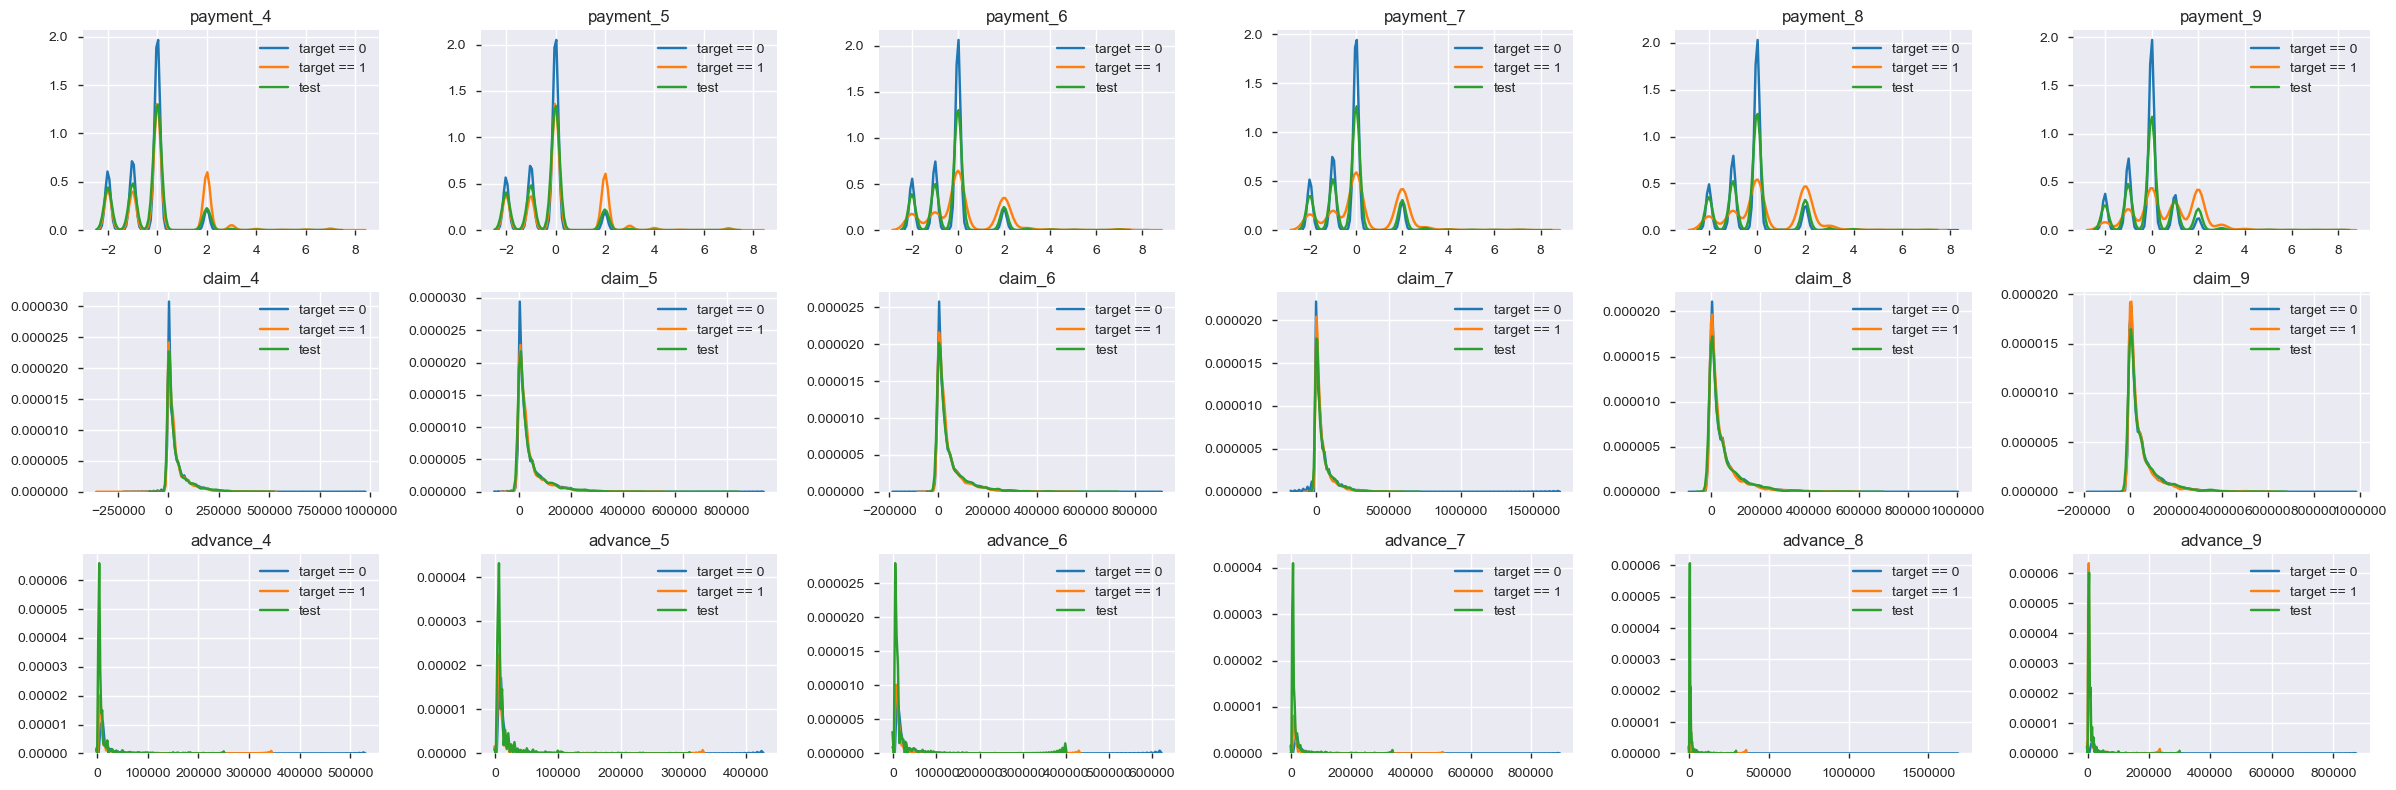

In [10]:
fig, axs = plt.subplots(3, 6, figsize=(24, 8))
axs = axs.flatten()

for i, col_base in enumerate(["payment", "claim", "advance"]):
    for j in range(6):
        col = f"{col_base}_{4+j}"
        sns.kdeplot(train_df[col][train_df["target"] == 0], label="target == 0", ax=axs[6*i + j])
        sns.kdeplot(train_df[col][train_df["target"] == 1], label="target == 1", ax=axs[6*i + j])
        sns.kdeplot(test_df[col], label="test", ax=axs[6*i + j])
        axs[6*i + j].set_title(col)
plt.tight_layout()

## payment

In [11]:
train_df.filter(regex="^payment").head()

,payment_9,payment_8,payment_7,payment_6,payment_5,payment_4
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,-1,0,-1,0,0,0
4,0,0,0,0,0,0


In [12]:
# descriptionにない-2が含まれていることが分かります
# どれも最小値は-2, 最大値は8のようです
train_df.filter(regex="^payment").describe()

,payment_9,payment_8,payment_7,payment_6,payment_5,payment_4
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,-0.012519,-0.128185,-0.162370,-0.216037,-0.262667,-0.287296
std,1.121953,1.196953,1.195634,1.169587,1.133373,1.150036
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


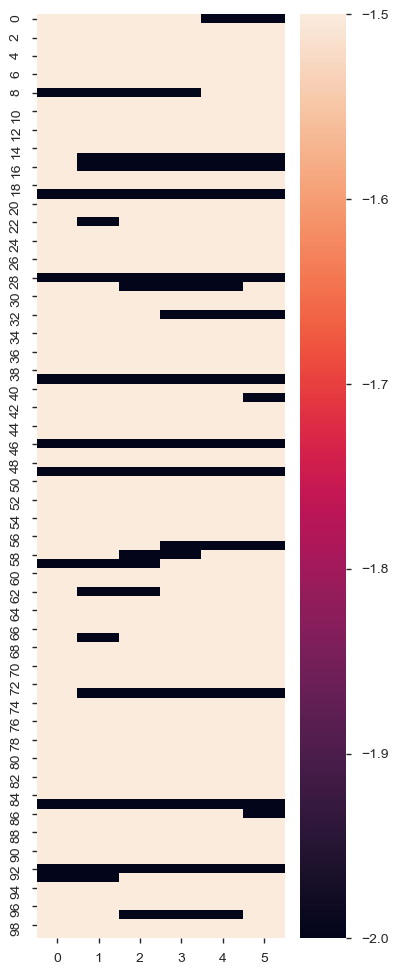

In [13]:
# -2だけの部分を図示してみましょう
fig, ax = plt.subplots(1, 1, figsize=(4, 12))
sns.heatmap(train_df.filter(regex="^payment").head(100).values, vmin=-2, vmax=-1.5)

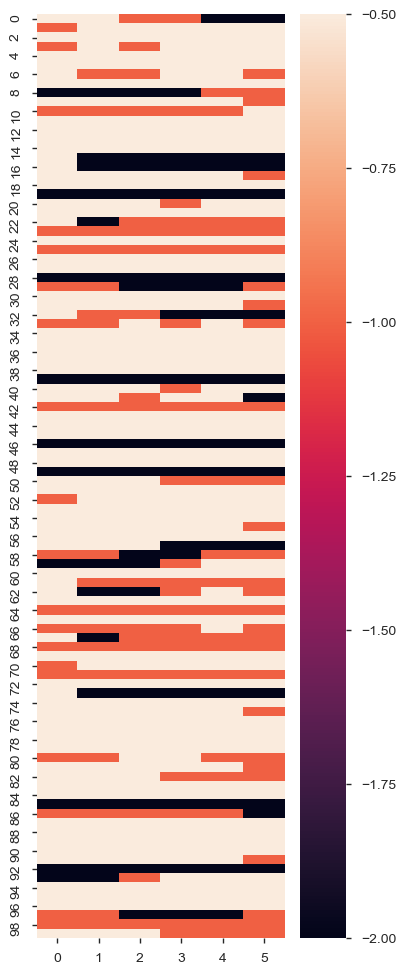

In [14]:
# -2, -1の部分を図示してみましょう
fig, ax = plt.subplots(1, 1, figsize=(4, 12))
sns.heatmap(train_df.filter(regex="^payment").head(100).values, vmin=-2, vmax=-0.5)

In [15]:
# ある地点まで-2であるか、もしくはある地点以降-2であるケースが多くみられますね

(-2, 8)

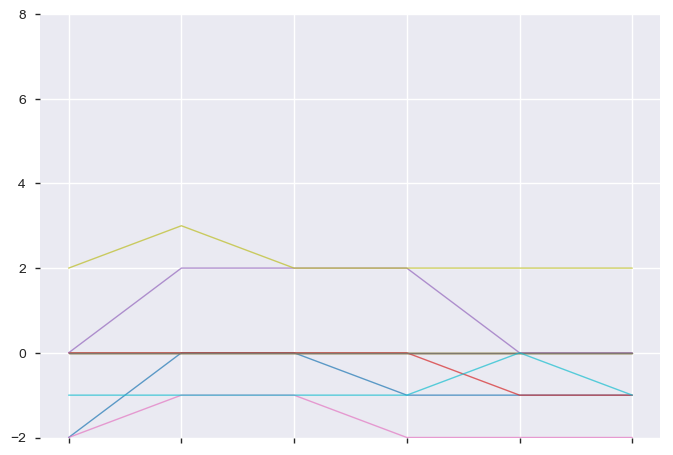

In [16]:
# 推移をプロットしてみる
# (sampleの数を変えたり複数回実行したりしましょう)
train_df.filter(regex="^payment").loc[:, ::-1].sample(10).T.plot(lw=1, legend=False, alpha=.7)
plt.ylim(-2, 8)

## claim

In [17]:
train_df.filter(regex="^claim").describe()

,claim_9,claim_8,claim_7,claim_6,claim_5,claim_4
count,27000.000000,27000.000000,2.700000e+04,27000.000000,27000.000000,27000.000000
mean,51125.750593,49088.579556,4.696029e+04,43247.852074,40345.600926,38894.870926
std,73398.366141,70906.202371,6.919943e+04,64150.721252,60681.919736,59547.938323
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3639.750000,3058.500000,2.743750e+03,2392.750000,1798.500000,1287.000000
50%,22400.000000,21298.000000,2.019050e+04,19114.000000,18219.500000,17179.000000
75%,66893.250000,63827.250000,5.998400e+04,54537.750000,50211.000000,49243.500000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [18]:
# 請求額がマイナスの月、ゼロの月
print("claim < 0")
print((train_df.filter(regex="^claim") < 0).mean())
print("claim == 0")
print((train_df.filter(regex="^claim") == 0).mean())

claim < 0
claim_9    0.019556
claim_8    0.021926
claim_7    0.021593
claim_6    0.022296
claim_5    0.021519
claim_4    0.022556
dtype: float64
claim == 0
claim_9    0.066037
claim_8    0.083148
claim_7    0.095148
claim_6    0.105926
claim_5    0.116593
claim_4    0.133222
dtype: float64


In [19]:
# claim == 0 のとき、payment == 2になりやすい？？？
for i in range(4, 10):
    print(((train_df[f"claim_{i}"] == 0)&(train_df[f"payment_{i}"] == -2)).sum()
              / (train_df[f"claim_{i}"] == 0).sum())

0.7442313038643313
0.7630241423125794
0.7692307692307693
0.7271311794472557
0.6659242761692651
0.33987661245092543


# modeling

In [20]:
# バリデーション戦略はとても大切です
# 今回はStratifiedKFoldを使います
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2434)

In [21]:
# random forestを使ってモデルを作成します
from sklearn.ensemble import RandomForestClassifier

train_oof = np.zeros(len(train_df))
test_oof = np.zeros(len(test_df))

X_test = test_df.drop("id", axis=1)
feature_importances_df = pd.DataFrame()

for fold, (train_idx, val_idx) in enumerate(skf.split(train_df, train_df["target"])):
    X_train = train_df.drop(["id", "target"], axis=1).loc[train_idx, :]
    X_val = train_df.drop(["id", "target"], axis=1).loc[val_idx, :]
    y_train = train_df["target"][train_idx]
    y_val = train_df["target"][val_idx]
    
    model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=2434)
    model.fit(X_train, y_train)
    
    fold_importances_df = pd.DataFrame()
    fold_importances_df["feature"] = X_test.columns
    fold_importances_df["importance"] = model.feature_importances_
    fold_importances_df["fold"] = fold + 1
    feature_importances_df = pd.concat([feature_importances_df,
                                        fold_importances_df], axis=0)

    train_oof[val_idx] = model.predict_proba(X_val)[:, 1]
    test_oof += model.predict_proba(X_test)[:, 1] / 5

In [22]:
from sklearn.metrics import accuracy_score
print("cv score is", accuracy_score((train_oof > .5), train_df["target"]))

cv score is 0.8145925925925926


In [23]:
# どの特徴が重要だったのかを確認する
feature_importances_df.groupby("feature")["importance"]\
                      .mean()\
                      .sort_values(ascending=False)

feature
payment_9    0.098441
age          0.066124
claim_9      0.060318
credit       0.059292
claim_8      0.054206
claim_7      0.052008
advance_9    0.051413
claim_4      0.050555
claim_6      0.050377
claim_5      0.050223
advance_8    0.047749
advance_7    0.046452
advance_4    0.045848
advance_5    0.043954
advance_6    0.042848
payment_8    0.039536
payment_7    0.030359
payment_6    0.024924
payment_5    0.020881
education    0.020189
payment_4    0.018280
marriage     0.013899
gender       0.012124
Name: importance, dtype: float64

In [24]:
# 提出用のファイルの作成
submission_df = test_df[["id"]].rename(columns={"id": "ID"})
submission_df["Y"] = (test_oof > .5).astype(np.uint8)
submission_df.to_csv("tutorial_submission.csv", index=None)

# アドバイス

## 特徴量を作ろう
たいていの場合、特徴量の工夫がコンペティションでの勝敗を左右します
* 特徴量に対して対数やルートを取ってみましょう
* 特徴量同士を足したり引いたりした特徴量を作ってみましょう。月ごとの組み合わせや差分に注目すると有効な気がします

## 色々なライブラリ/手法を試そう
様々なライブラリを駆使して、いろいろなモデルを試してみましょう。
モデリング用のライブラリとして
* [scikit-kearn](https://scikit-learn.org/stable/index.html) 多くの手法があるstandard的ライブラリ
* [XGBoost](https://xgboost.readthedocs.io/en/latest/)/[LightGBM](https://lightgbm.readthedocs.io/en/latest/)/[CatBoost](https://tech.yandex.com/catboost/) 勾配ブースティング木のライブラリ
* [Keras](https://keras.io/ja/)/[Pytorch](https://pytorch.org/) NeuralNet用のライブラリ
* fast.aiの[tabular learner](https://docs.fast.ai/tabular.html)
* [xlearn](https://xlearn-doc.readthedocs.io/en/latest/index.html) factorization machineのライブラリ

また、他にも便利なライブラリとして
* [tqdm](https://github.com/tqdm/tqdm) プログレスバーを簡単に出せるライブラリ
* [fancyimput](https://pypi.org/project/fancyimpute/) 欠損値補完用のライブラリ
* [imbalanced-learn](https://imbalanced-learn.readthedocs.io/en/stable/) 不均衡データを扱うためのライブラリ
* [hyperopt](http://hyperopt.github.io/hyperopt/)/[Optuna](https://optuna.readthedocs.io/en/stable/) パラメータ探索用のライブラリ
* [UMAP](https://umap-learn.readthedocs.io/en/latest/) 次元圧縮用のライブラリ
* [Boruta](https://github.com/scikit-learn-contrib/boruta_py) 特徴量選択用のライブラリ

などがあります。



## 過去問、資料を探そう

kaggleやSIGNATEを参考に、似たようなコンペティションを探しましょう。
多くの場合、解法やそれに用いたコードが公開されているので、それを参考にするとよいです

### 類似コンペ
* [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

  有名なkaggleのTutorial用コンペです。これも01分類のテーブルデータのコンペティションで、多くのtutorial用のコードが公開されています


* [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk)

　同じく顧客のクレジットカード支払いに関する予測を行うコンペティションです。

### 資料
#### 書籍
* [前処理大全](https://gihyo.jp/book/2018/978-4-7741-9647-3)
* [機械学習のための特徴量エンジニアリング](https://www.oreilly.co.jp/books/9784873118680/)

　どちらの書籍も機械学習コンペティションに用いる特徴量エンジニアリングのコツがたくさん載っていてお勧めです。


#### スライド
* [最近のKaggleに学ぶテーブルデータの特徴量エンジニアリング](https://www.slideshare.net/mlm_kansai/kaggle-138546659)

　Kaggle MasterでありPLAsTiCCで入賞したNomiさんの公開した資料で、上記の書籍よりも発展的な特徴量エンジニアリングが紹介されています


#### 動画
* [How to Win a Data Science Competition: Learn from Top Kagglers](https://ja.coursera.org/learn/competitive-data-science)

　有名なcourseraのkaggle講座です。難易度は高いですが、これを修了できる人ならきっとこのコンペティションでも上位に入れるでしょう。

## 一般的なアドバイス

### 全部試そう
思いついたことは全部試してみましょう。[ノーフリーランチ定理](https://ja.wikipedia.org/wiki/%E3%83%8E%E3%83%BC%E3%83%95%E3%83%AA%E3%83%BC%E3%83%A9%E3%83%B3%E3%83%81%E5%AE%9A%E7%90%86)という言葉があるように、なんにでも必ず効く手法はなく、全て実験する必要があります。書いたコードをきちんと保管しておけばほかの機会にも役立つはずなので、まずはいろいろと試してみましょう。

### Trust Your CV
今回はtest_dataの数が全体で3000件と少なく、その上LBに反映されるのはそのうちの数割だと思われます。そのためLBのみで判断すると、shake-downを起こす可能性があります。手元のcvスコアを信じましょう

## 最後に
ここまで読んでいただきありがとうございました。Happy Modeling!!